## Data Ethics - Assignment - Part 1

### Perform two tasks -
### 1 - Understand the buying pattern and trends of the existing customers based on the data provided
### 2 - Understand which customers are likely to churn out and why?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import random
import matplotlib.ticker as ticker
from datetime import datetime

#from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LogisticRegression
#from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import LabelEncoder, MultiLabelBinarizer, OneHotEncoder

# Ignore all warnings
warnings.filterwarnings("ignore")

from sklearn.cluster import KMeans

# Customer Churn Modeling
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score,confusion_matrix,f1_score,accuracy_score
!pip install fairlearn
from fairlearn.metrics import selection_rate, MetricFrame
from sklearn.metrics import accuracy_score, recall_score, precision_score
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from fairlearn.metrics import selection_rate, MetricFrame
from fairlearn.postprocessing import ThresholdOptimizer


In [2]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Load the dataset

file_path ='/content/drive/MyDrive/Data ethics assingment/Data+ethics+assignment+-+dataset.xlsx'
data = pd.read_excel(file_path)

In [4]:
data=pd.DataFrame(data)
data.sample(5)

,Order,Member,SKU,Created On,Description,Member's Full Name,Member's Address,Member's Email,Member's Phone Number,Member's Gender,Member's Date of Birth,Member's Membership Level,Member's Purchase History,Order Value,Payment Method,Delivery Address,Order Status,Credit Card Number
810,6691932,M86304,"15668468, 15668380, 7640186, 15668476, 15668381",20-07-2014,"Beans, Other Vegetables, Honey, Exotic Vegetab...",Andrew Sparks,"53810 Michelle Bridge, North Shelly, MP 98757",randallmurphy@example.org,328.967.2075x140,Male,29-04-1960,Silver,10,534,Credit Card,"218 Williams Glen, West Robinshire, TX 03681",Shipped,3.028430e+13
5056,7809876,M36432,15669824,2012-08-07 00:00:00,Raw Rice,Robin Smith,"USNV Jones, FPO AP 76969",dschmitt@example.org,(283)853-9393,Female,15-06-2017,Gold,2,838,Credit Card,"3632 James Mountains Apt. 322, Smithfurt, CA 6...",Shipped,4.601138e+12
2932,7572340,M48154,"7735555, 7580034, 15668467",22-05-2013,"Rasagulla & Gulab Jamun, Ice Creams & Desserts...",Tina Martin,"66463 Johnson Causeway, Lake Reneeshire, NE 02326",cynthiagriffin@example.com,001-997-951-3916,Male,2012-05-03 00:00:00,Bronze,2,832,PayPal,"2915 Dominguez Mill Apt. 263, Smithport, OK 56680",Pending,NaN
5415,7839344,M32039,"15668459, 15668520, 7753740, 15668379",2012-03-08 00:00:00,"Gourd & Cucumber, Bread, Health Drinks, Other ...",Audrey Gould,"60877 Bailey River, Wrightberg, AL 00573",bethany89@example.org,538-912-9508x9751,Female,14-10-1978,Bronze,6,494,Cash,"2870 Michael Run Suite 203, North William, NH ...",Pending,NaN
2184,7472903,M96365,"34986125, 15669803, 15669996, 15669784, 156697...",26-07-2013,"Whole Spices, Cashews, Other Pulses, Basmati R...",Leslie Tran,"68088 Morgan Courts, East Michael, PW 92819",whernandez@example.org,3837875603,Female,31-08-1951,Gold,6,277,Credit Card,"0120 Ricardo Expressway Suite 377, Maloneland,...",Shipped,4.530631e+15


In [5]:
data.dtypes


Order                          int64
Member                        object
SKU                           object
Created On                    object
Description                   object
Member's Full Name            object
Member's Address              object
Member's Email                object
Member's Phone Number         object
Member's Gender               object
Member's Date of Birth        object
Member's Membership Level     object
Member's Purchase History      int64
Order Value                    int64
Payment Method                object
Delivery Address              object
Order Status                  object
Credit Card Number           float64
dtype: object

# Understanding the dataset



In [6]:
# data.info() or
data.isnull().sum()

Order                           0
Member                          0
SKU                             0
Created On                      0
Description                     0
Member's Full Name              0
Member's Address                0
Member's Email                  0
Member's Phone Number           0
Member's Gender                 0
Member's Date of Birth          0
Member's Membership Level       0
Member's Purchase History       0
Order Value                     0
Payment Method                  0
Delivery Address                0
Order Status                    0
Credit Card Number           5624
dtype: int64

In [7]:
# Step 3c: Randomization - masking credit card numbers since it's very sensitive data

# Assuming data is your DataFrame
num_rows = len(data)
random_card_numbers = [str(random.randint(10**15, 10**16 - 1)) for _ in range(num_rows)]

data['Credit Card Number'] = random_card_numbers


In [8]:
# Convert 'Created On' column to datetime type
data['OrderDate'] = pd.to_datetime(data['Created On'], errors='coerce')
data['DOB'] = pd.to_datetime(data['Member\'s Date of Birth'], errors='coerce')
data['DOB'] = pd.to_datetime(data['DOB'], format='%Y-%m-%d')

# Calculate age using current date
current_date = datetime.now()
data['Age'] = ((current_date - data['DOB']).dt.days) // 365.25

print(data['Age'].sample(5))


8305    109.0
63      114.0
7590     79.0
7351    102.0
6726     70.0
Name: Age, dtype: float64


In [9]:
max_created_on = data['OrderDate'].max()
data['LastPurchaseDate'] = max_created_on - data['OrderDate']
data['LastPurchaseDays'] = data['LastPurchaseDate'].dt.days
data.sample(5)

,Order,Member,SKU,Created On,Description,Member's Full Name,Member's Address,Member's Email,Member's Phone Number,Member's Gender,...,Order Value,Payment Method,Delivery Address,Order Status,Credit Card Number,OrderDate,DOB,Age,LastPurchaseDate,LastPurchaseDays
4966,7801922,M32039,"15669976, 15668379, 15668520, 15668468, 762170...",16-07-2012,"Almonds, Other Vegetables, Bread, Beans, Gluco...",Corey Lee,"92580 Murray Lights, West Kellyside, AZ 94900",cannonthomas@example.org,-4539,Female,...,539,Credit Card,"9869 Robert Causeway Suite 361, Craigstad, MH ...",Pending,9207533537397096,2012-07-16,1913-07-14,110.0,812 days,812
1475,7371383,M59012,"15668468, 7613349, 34985989",30-10-2013,"Beans, Honey, Mustard Oils",Craig Blair,"0716 Roger Wall Apt. 000, Santiagoville, KS 76578",joel68@example.org,+1-396-777-2859x04455,Female,...,615,PayPal,"90203 Cooper Trace Suite 024, North Brandonfur...",Shipped,3700534148192795,2013-10-30,1961-09-26,62.0,341 days,341
7648,8277425,M50767,"15668451, 15668462, 15668460, 15669858, 156684...",2014-01-05 00:00:00,"Brinjals, Gourd & Cucumber, Gourd & Cucumber, ...",Sally Richards,"520 Jones Mountains Apt. 217, Colemanbury, AR ...",fkennedy@example.net,001-428-866-7787x231,Female,...,921,PayPal,"3866 Brown Avenue, Sharonberg, FM 68555",Pending,2213653661865424,2014-01-05,1986-10-14,37.0,274 days,274
865,6707524,M35538,"7572313, 7736902, 7586308, 7586526",24-07-2014,"Snacks, Snacks, Chips, Snacky Nuts",Brittany George,"56327 Schneider Street Apt. 118, Rebeccahaven,...",kscott@example.com,693.851.4666x015,Male,...,642,Credit Card,"42891 Betty Flat, Marcusbury, RI 48887",Pending,7656367071414181,2014-07-24,2005-09-15,18.0,74 days,74
498,6596752,M42182,"21408947, 7572251, 15668458",17-08-2014,"Other Rice Products, Cooking Paste, Brinjals",Andrew Doyle,"1059 Murphy Junctions Suite 185, North Henrysh...",danielscaleb@example.com,902.959.1223x4762,Male,...,685,PayPal,"440 John Forges Apt. 232, Darinchester, NY 99119",Delivered,4433976329247851,2014-08-17,2000-05-12,23.0,50 days,50


## 1.1 - Understand the buying pattern and trends of the existing customers based on the data provided

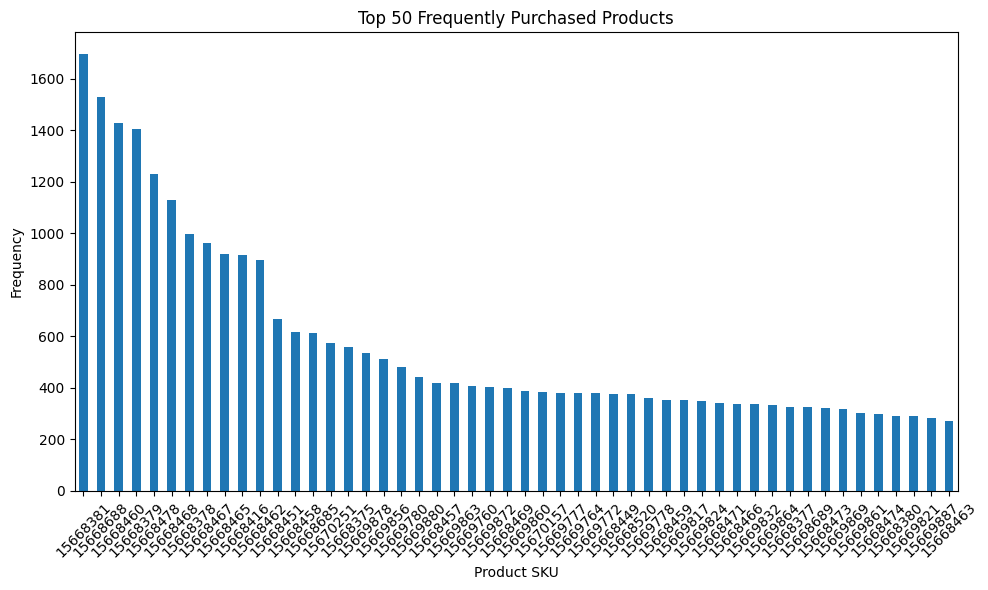

Total number of unique products: 1725


In [10]:
# Split SKU to observe the frequency of the product purchased by member
data_sku_expanded = data['SKU'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True).to_frame(name='SKU')
data_sku_expanded.reset_index(drop=True, inplace=True)

# Count the frequency of each product
product_counts = data_sku_expanded['SKU'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
top_products = product_counts.head(50)
top_products.sort_values(ascending=False).plot(kind='bar')
plt.title('Top 50 Frequently Purchased Products')
plt.xlabel('Product SKU')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print total number of unique products
total_unique_products = len(product_counts)
print(f"Total number of unique products: {total_unique_products}")


### Insights - Out of 1725 unique products; 6 products are brought 1000+ times.

In [11]:
data_sku_expanded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61566 entries, 0 to 61565
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   SKU     61566 non-null  object
dtypes: object(1)
memory usage: 481.1+ KB


### Insights - After exploding the SKU column, the # of rows increased from ~8000 to ~62000 rows

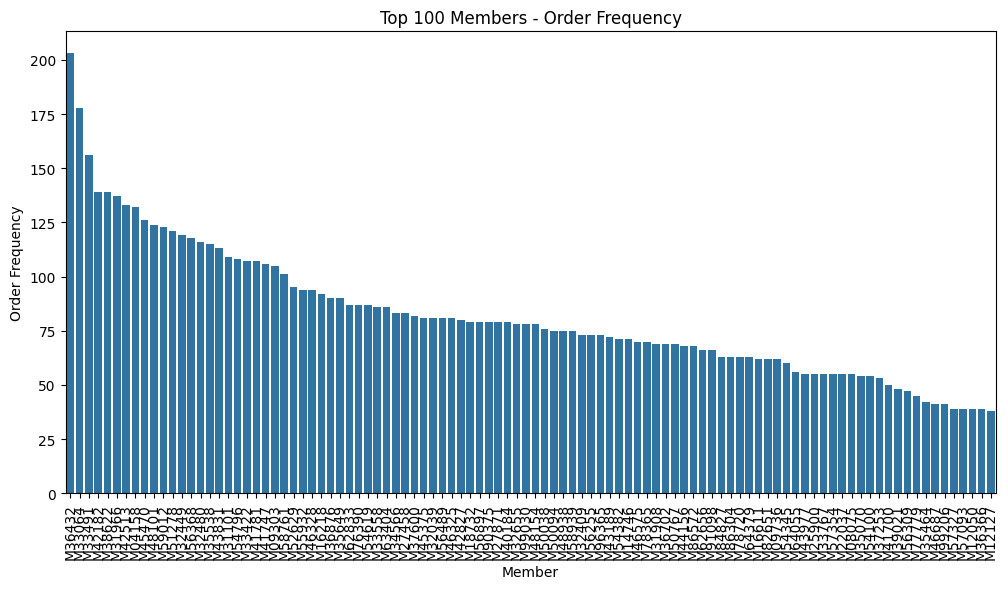

In [12]:
# Step 1: Calculate order frequency for each member
order_frequency = data.groupby('Member')['Order'].count()

# Step 2: Sort members based on order frequency in descending order
sorted_members = order_frequency.sort_values(ascending=False)

# Step 3: Select the top 100 members
top_100_members = sorted_members.head(100)

# Step 4: Create a bar plot to visualize order frequency for top 100 members
plt.figure(figsize=(12, 6))
sns.barplot(x=top_100_members.index, y=top_100_members.values)
plt.xticks(rotation=90)
plt.xlabel('Member')
plt.ylabel('Order Frequency')
plt.title('Top 100 Members - Order Frequency')
plt.show()

### Insights - Top 100 members purchase frequency. First customer has purchased ~203 orders and last customer had ordered ~50 orders

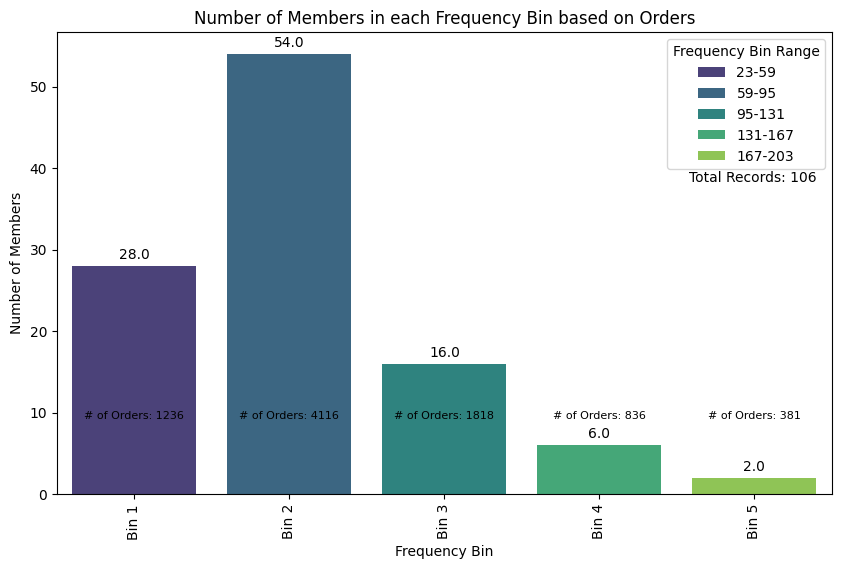

In [13]:
# Group data by 'Member' and count the number of orders for each member
orders_per_member = data.groupby('Member').size()

# Create bins for the number of orders
num_bins = 5
bins = pd.cut(orders_per_member, bins=num_bins, labels=[f'Bin {i}' for i in range(1, num_bins + 1)])

# Create a DataFrame to store the data
orders_df = pd.DataFrame({'Member': orders_per_member.index, 'Number of Orders': orders_per_member.values, 'Frequency Bin': bins})

# Sort the DataFrame by the number of orders in descending order
orders_df = orders_df.sort_values(by='Number of Orders', ascending=False)

# Plot the data using Seaborn countplot
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Frequency Bin', data=orders_df, palette='viridis')
plt.xlabel('Frequency Bin')
plt.ylabel('Number of Members')
plt.title('Number of Members in each Frequency Bin based on Orders')

# Get the bin ranges and set them as x-axis labels
bin_ranges = pd.cut(orders_per_member, bins=num_bins).value_counts().sort_index()
bin_labels = [f'Bin {i}' for i in range(1, num_bins + 1)]
ax.set_xticklabels(bin_labels, rotation=90)

# Create a custom legend with bin ranges as integers
legend_labels = [f'{int(label.left)}-{int(label.right)}' for label in bin_ranges.index]
ax.legend(handles=ax.patches, labels=legend_labels, title='Frequency Bin Range', loc='upper right')

# Annotate the count of records on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', xy=(p.get_x() + p.get_width() / 2, height), xytext=(0, 3),
                textcoords='offset points', ha='center', va='bottom')

# Annotate the sum of the count of orders for each bin group on top of each bar
for i, bin_label in enumerate(bin_labels):
    orders_count = orders_df[orders_df['Frequency Bin'] == bin_label]['Number of Orders'].sum()
    ax.annotate(f'# of Orders: {orders_count}', xy=(i, 0), xytext=(0, 60),
                textcoords='offset points', ha='center', va='top', fontsize=8)

# Add a text annotation to show the total number of records displayed in the chart
total_records = len(orders_df)
plt.text(0.98, 0.70, f'Total Records: {total_records}', ha='right', va='top', transform=ax.transAxes, fontsize=10)

plt.show()


## Insights -

### Bin 1 - each of 28 members have ordered bewtween 23-59 orders with total of 1236 orders
### Bin 2 - each of 54 members have ordered bewtween 59-95 orders with total of 4116 orders
### Bin 3 - each of 16 members have ordered bewtween 95-131 orders with total of 1818 orders
### Bin 4 - each of 6 members have ordered bewtween 131-167 orders with total of 836 orders
### Bin 5 - each of 2 members have ordered bewtween 167-203 orders with total of 381 orders

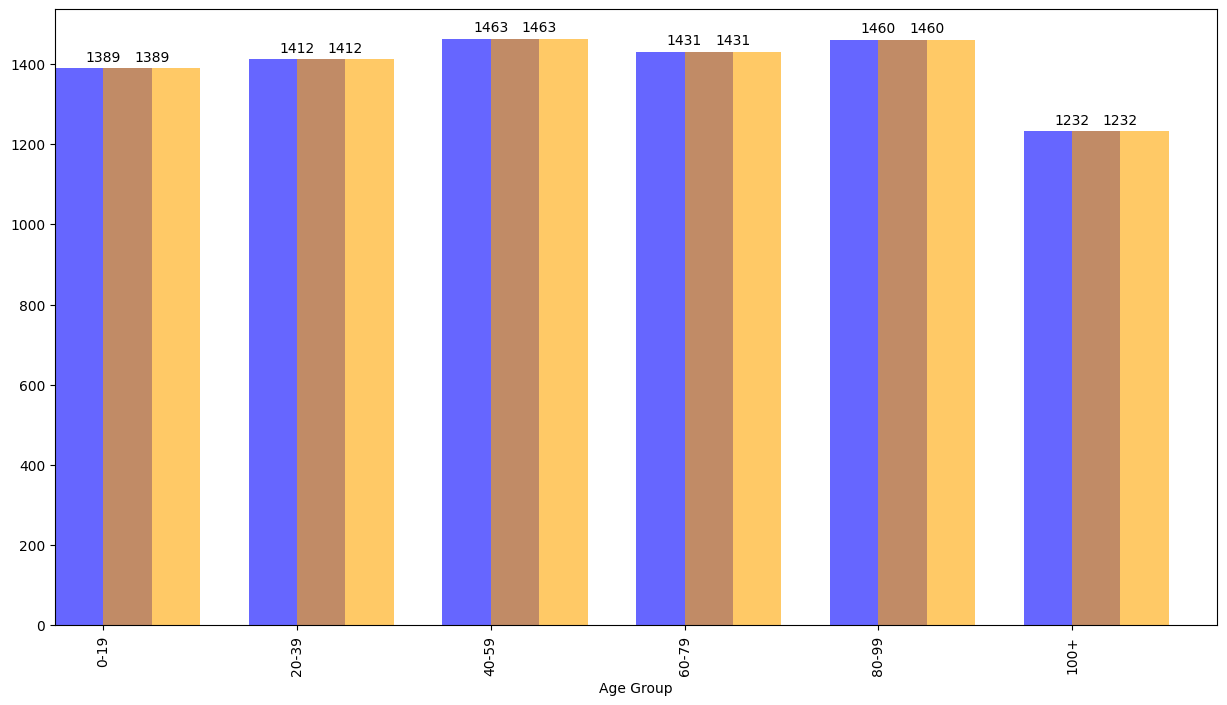

In [14]:
# Group data by 'Member' and count the number of orders for each member
orders_per_member = data.groupby('Member').size()

# Create age bins and group members based on their age
age_bins = [0, 20, 40, 60, 80, 100, float('inf')]
age_labels = ['0-19', '20-39', '40-59', '60-79', '80-99', '100+']
data['Age Group'] = pd.cut(data['Age'], bins=age_bins, labels=age_labels, right=False)

# Count the number of members for each age group
age_group_counts = data['Age Group'].value_counts().sort_index()

# Count the number of orders for each age group
order_counts_by_age_group = data.groupby('Age Group')['Order'].count()

# Plot the data using a bar chart
plt.figure(figsize=(15, 8))
ax = age_group_counts.plot(kind='bar', alpha=0.6, label='Number of Members', color='blue')
order_counts_by_age_group.plot(kind='bar', alpha=0.6, label='Number of Orders', color='orange', ax=ax, position=0)

# Display the count of unique members on top of the bars
for p1, p2 in zip(ax.patches, ax.patches[len(ax.patches)//2:]):
    height1 = p1.get_height()
    height2 = p2.get_height()
    ax.annotate(f'{height1}', xy=(p1.get_x() + p1.get_width() / 2, height1), xytext=(0, 3),
                textcoords='offset points', ha='center', va='bottom')
    ax.annotate(f'{height2}', xy=(p2.get_x() + p2.get_width() / 2, height2), xytext=(0, 3),
                textcoords='offset points', ha='center', va='bottom')



### Insights - Number of orders in the 100+ age group is comparatively less than the other age groups

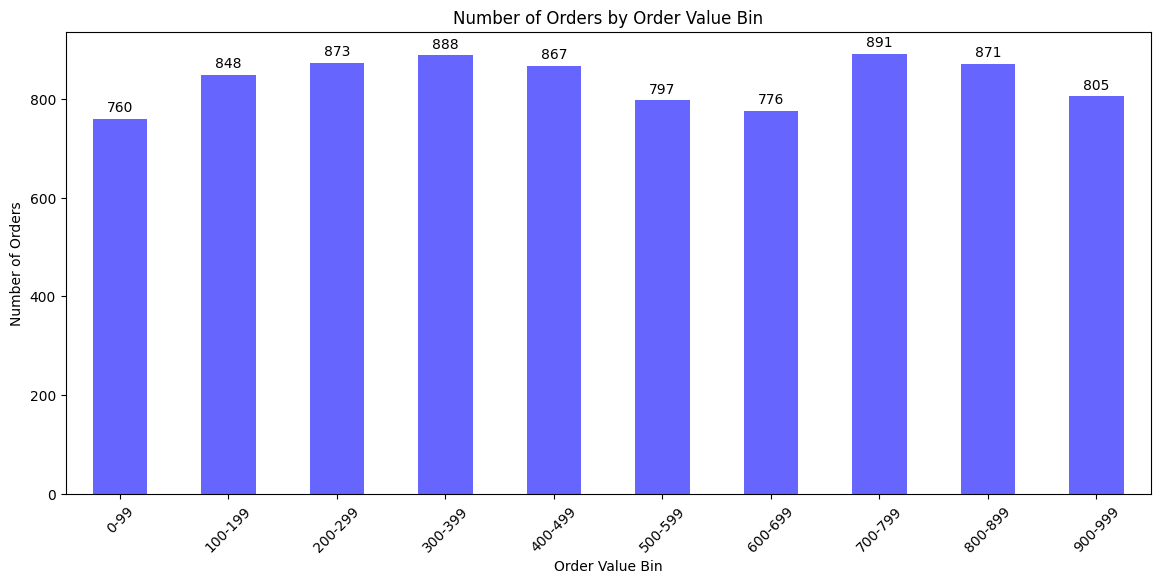

In [15]:
# Create bins for the "Order Value"
order_value_bins = [i * 100 for i in range(11)]
order_value_labels = [f'{i}-{i+99}' for i in range(0, 1000, 100)]
data['Order Value Bin'] = pd.cut(data['Order Value'], bins=order_value_bins, labels=order_value_labels, right=False)

# Group data by "Order Value Bin" and count the number of orders in each bin
order_counts_by_value_bin = data.groupby('Order Value Bin')['Order'].count()

# Plot the data using a bar chart
plt.figure(figsize=(14, 6))
ax = order_counts_by_value_bin.plot(kind='bar', alpha=0.6, color='blue')

plt.xlabel('Order Value Bin')
plt.ylabel('Number of Orders')
plt.title('Number of Orders by Order Value Bin')

# Annotate the count of orders on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', xy=(p.get_x() + p.get_width() / 2, height), xytext=(0, 3),
                textcoords='offset points', ha='center', va='bottom')

plt.xticks(rotation=45)
plt.show()


### Insights - Number of orders are almost same w.r.t price. Price is not a driving factor to determine the number of purchases made.

In [16]:
# Step 2: Analyze distribution of categorical columns
print(data['Member\'s Gender'].value_counts())
print(data['Member\'s Membership Level'].value_counts())
print(data['Payment Method'].value_counts())
print(data['Order Status'].value_counts())


Member's Gender
Female    4308
Male      4079
Name: count, dtype: int64
Member's Membership Level
Silver    2847
Gold      2822
Bronze    2718
Name: count, dtype: int64
Payment Method
PayPal         2866
Credit Card    2763
Cash           2758
Name: count, dtype: int64
Order Status
Shipped      2864
Pending      2768
Delivered    2755
Name: count, dtype: int64


## Insights - Data is equally distributed by Gender, Membership level, Payment method and order status.

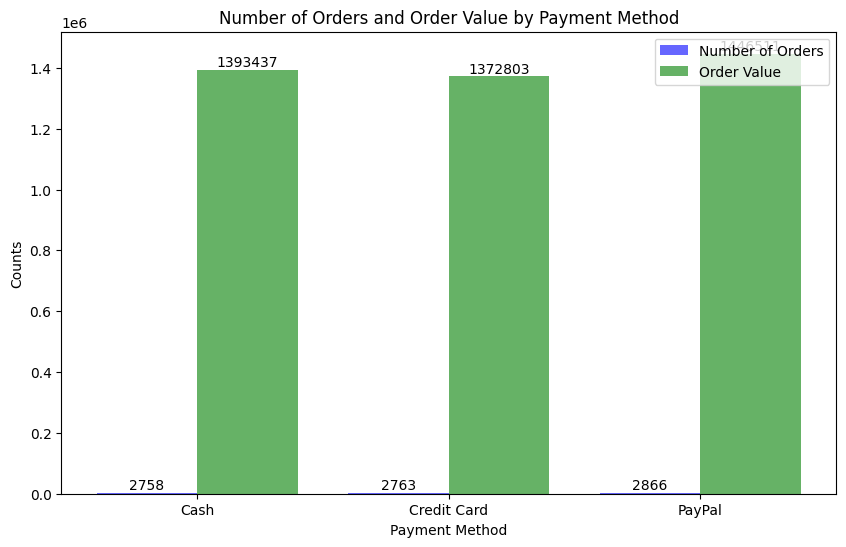

In [17]:
# Group data by 'Payment Method' and calculate the number of orders and total order value for each payment method
payment_method_stats = data.groupby('Payment Method').agg({
    'Order': 'count',
    'Order Value': 'sum'
}).reset_index()

# Create a bar plot to visualize the number of orders and total order value by payment method
plt.figure(figsize=(10, 6))
ax = plt.gca()

width = 0.4
x = range(len(payment_method_stats))
bars1 = ax.bar(x, payment_method_stats['Order'], width=width, color='blue', alpha=0.6, align='center', label='Number of Orders')
bars2 = ax.bar([i + width for i in x], payment_method_stats['Order Value'], width=width, color='green', alpha=0.6, align='center', label='Order Value')

plt.xlabel('Payment Method')
plt.ylabel('Counts')
plt.title('Number of Orders and Order Value by Payment Method')
plt.xticks([i + width/2 for i in x], payment_method_stats['Payment Method'])
plt.legend()

# Annotate the bars with the actual values
for bar1, bar2 in zip(bars1, bars2):
    height1 = bar1.get_height()
    height2 = bar2.get_height()
    ax.text(bar1.get_x() + bar1.get_width() / 2, height1, f'{int(height1)}', ha='center', va='bottom')
    ax.text(bar2.get_x() + bar2.get_width() / 2, height2, f'{int(height2)}', ha='center', va='bottom')

plt.show()


### Inference - Online orders value inluding credit card and paypal is more than cash orders

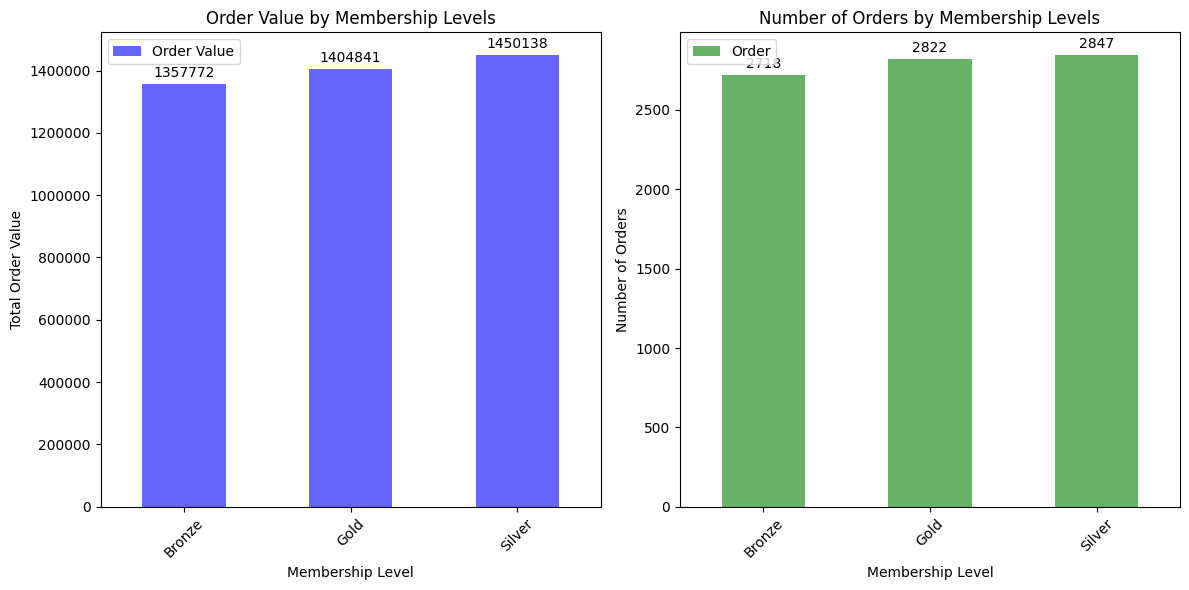

In [18]:
# Group data by 'Member's Membership Level' and calculate the total order value and count of orders for each level
membership_level_stats = data.groupby("Member's Membership Level").agg({
    'Order Value': 'sum',
    'Order': 'count'
}).reset_index()

# Create a bar plot to visualize the order value by membership levels
plt.figure(figsize=(12, 6))
ax = plt.subplot(1, 2, 1)
membership_level_stats.plot(x="Member's Membership Level", y='Order Value', kind='bar', color='blue', alpha=0.6, ax=ax)
plt.xlabel("Membership Level")
plt.ylabel("Total Order Value")
plt.title("Order Value by Membership Levels")
plt.xticks(rotation=45)

# Format y-axis labels to remove exponents
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))

# Annotate the actual values on top of each bar (total order value)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', xy=(p.get_x() + p.get_width() / 2, height), xytext=(0, 3),
                textcoords='offset points', ha='center', va='bottom')

# Create a bar plot to visualize the number of orders by membership levels
ax2 = plt.subplot(1, 2, 2)
membership_level_stats.plot(x="Member's Membership Level", y='Order', kind='bar', color='green', alpha=0.6, ax=ax2)
plt.xlabel("Membership Level")
plt.ylabel("Number of Orders")
plt.title("Number of Orders by Membership Levels")
plt.xticks(rotation=45)

# Annotate the actual values on top of each bar (count of orders)
for p in ax2.patches:
    height = p.get_height()
    ax2.annotate(f'{height}', xy=(p.get_x() + p.get_width() / 2, height), xytext=(0, 3),
                 textcoords='offset points', ha='center', va='bottom')

plt.tight_layout()
plt.show()


### Inference - Silver members create orders worth 1.45 million followed by Gold members ordering worth 1.4 million and bronze members ordersing worth 1.35 million

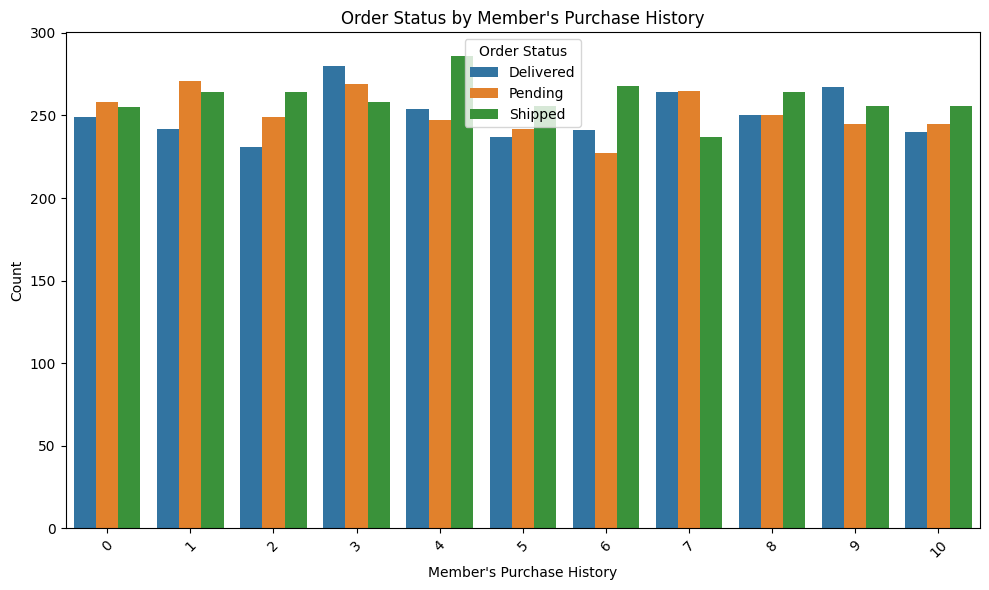

In [19]:
# Group the data by 'Member's Purchase History' and 'Order Status', and count the occurrences
grouped_data = data.groupby(['Member\'s Purchase History', 'Order Status'])['Member'].count().reset_index()

# Plot the grouped bar plot with hue differentiation for 'Order Status'
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_data, x='Member\'s Purchase History', y='Member', hue='Order Status')

plt.xlabel("Member's Purchase History")
plt.ylabel("Count")
plt.title("Order Status by Member's Purchase History")
plt.xticks(rotation=45)
plt.legend(title='Order Status')
plt.tight_layout()
plt.show()


Members with pending orders for more than 30 days:
['M56309' 'M36702' 'M41781' 'M09303' 'M46325' 'M45470' 'M36432' 'M31966'
 'M54796' 'M82651' 'M43831' 'M32409' 'M58939' 'M86304' 'M56516' 'M27458'
 'M42182' 'M56489' 'M32449' 'M46575' 'M76390' 'M16611' 'M32480' 'M33767'
 'M54619' 'M27871' 'M35464' 'M86572' 'M38622' 'M63404' 'M99030' 'M14746'
 'M59012' 'M31101' 'M64055' 'M37600' 'M43189' 'M18732' 'M42827' 'M77779'
 'M12050' 'M91098' 'M51278' 'M90375' 'M41700' 'M78365' 'M44156' 'M39021'
 'M78720' 'M56368' 'M55932' 'M54100' 'M48101' 'M62833' 'M64379' 'M35538'
 'M56255' 'M46687' 'M99206' 'M45375' 'M58761' 'M31908' 'M56897' 'M33491'
 'M54345' 'M42513' 'M35649' 'M96365' 'M08075' 'M48938' 'M59232' 'M52629'
 'M36876' 'M33422' 'M57093' 'M54382' 'M62656' 'M09736' 'M57354' 'M48154'
 'M46328' 'M16218' 'M35070' 'M43977' 'M33558' 'M25900' 'M84827' 'M36366'
 'M57327' 'M04158' 'M41747' 'M32655' 'M32039' 'M22037' 'M33064' 'M37253'
 'M47229' 'M40184' 'M50038' 'M50767' 'M50094' 'M34566' 'M50420' 'M12127'


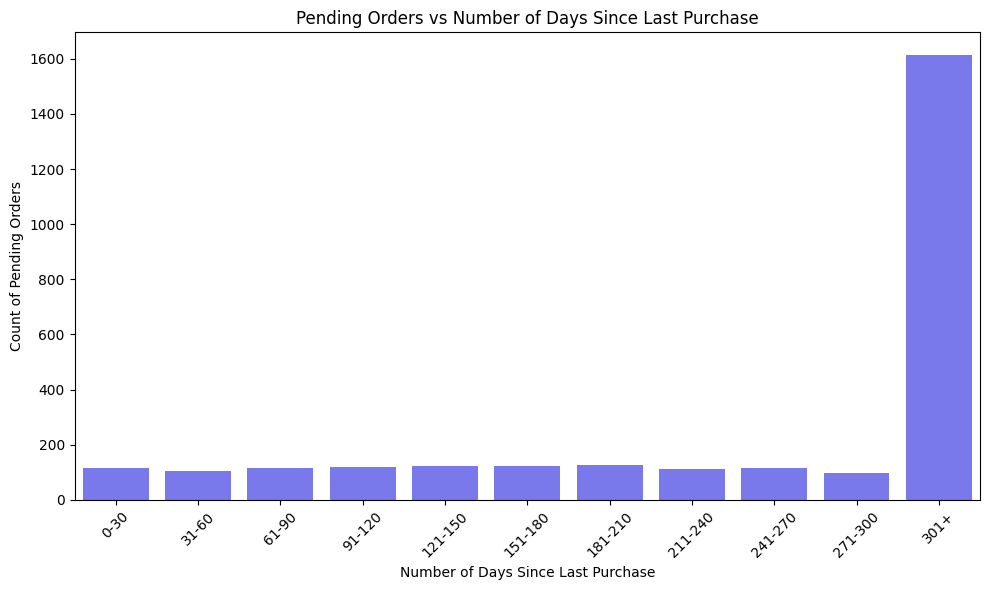

In [20]:
# Filter data for pending orders
pending_orders = data[data['Order Status'] == 'Pending']

# Define bins for grouping LastPurchaseDays
bins = [0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, float('inf')]
labels = ['0-30', '31-60', '61-90', '91-120', '121-150', '151-180', '181-210', '211-240', '241-270', '271-300', '301+']

# Bin the data based on LastPurchaseDays and count pending orders in each bin
pending_orders['DaysBin'] = pd.cut(pending_orders['LastPurchaseDays'], bins=bins, labels=labels, right=False)
grouped_data = pending_orders.groupby('DaysBin')['Order'].count().reset_index()

# Print member names with pending orders for more than 30 days
members_pending_over_30_days = pending_orders[pending_orders['LastPurchaseDays'] > 30]['Member'].unique()
print("Members with pending orders for more than 30 days:")
print(members_pending_over_30_days)

# Plot the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_data, x='DaysBin', y='Order', color='blue', alpha=0.6)

plt.xlabel("Number of Days Since Last Purchase")
plt.ylabel("Count of Pending Orders")
plt.title("Pending Orders vs Number of Days Since Last Purchase")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Insights - Members whose orders are in still pending status with more than 30 days are likely to churn

## 1.2 Understand which customers are likely to churn out and why

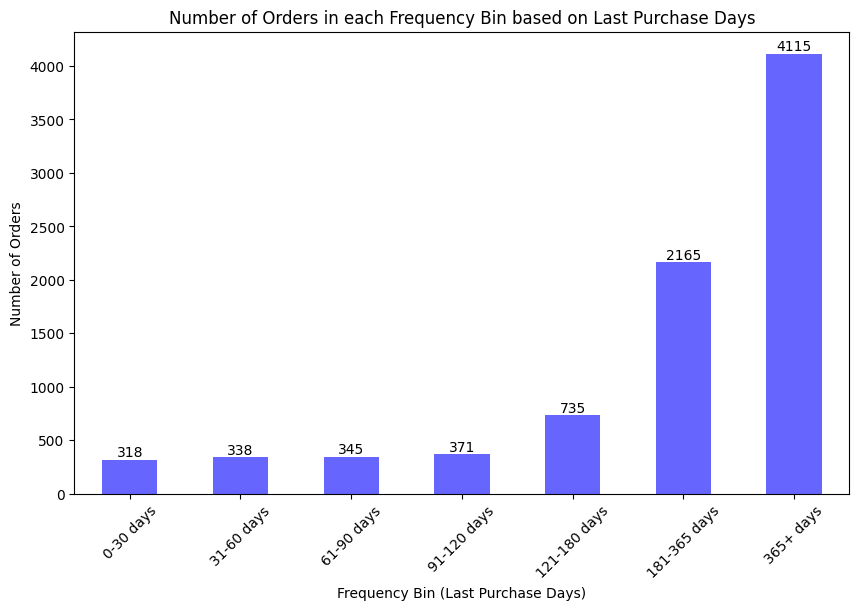

In [21]:
#To bucket the 'LastPurchaseDays' variable and plot the number of orders made

# Define the bins for 'LastPurchaseDays'
last_purchase_bins = [0, 30, 60, 90, 120, 180, 365, float('inf')]
last_purchase_labels = ['0-30 days', '31-60 days', '61-90 days', '91-120 days', '121-180 days', '181-365 days', '365+ days']

# Use pd.cut to create 'Frequency Bin' column with the corresponding bins
data['Frequency Bin'] = pd.cut(data['LastPurchaseDays'], bins=last_purchase_bins, labels=last_purchase_labels, right=False)

# Group data by 'Frequency Bin' and count the number of orders in each bin
grouped_data = data['Frequency Bin'].value_counts().sort_index()

# Plot the results using a bar chart
plt.figure(figsize=(10, 6))
grouped_data.plot(kind='bar', color='blue', alpha=0.6)
plt.xlabel('Frequency Bin (Last Purchase Days)')
plt.ylabel('Number of Orders')
plt.title('Number of Orders in each Frequency Bin based on Last Purchase Days')
plt.xticks(rotation=45)

# Annotate the count of orders on top of each bar
for idx, value in enumerate(grouped_data):
    plt.text(idx, value, str(value), ha='center', va='bottom')

plt.show()


In [22]:
data.dtypes


Order                                  int64
Member                                object
SKU                                   object
Created On                            object
Description                           object
Member's Full Name                    object
Member's Address                      object
Member's Email                        object
Member's Phone Number                 object
Member's Gender                       object
Member's Date of Birth                object
Member's Membership Level             object
Member's Purchase History              int64
Order Value                            int64
Payment Method                        object
Delivery Address                      object
Order Status                          object
Credit Card Number                    object
OrderDate                     datetime64[ns]
DOB                           datetime64[ns]
Age                                  float64
LastPurchaseDate             timedelta64[ns]
LastPurcha

### Inference - 75% (6280 out of 8387 orders) of orders are purchased after 180 days

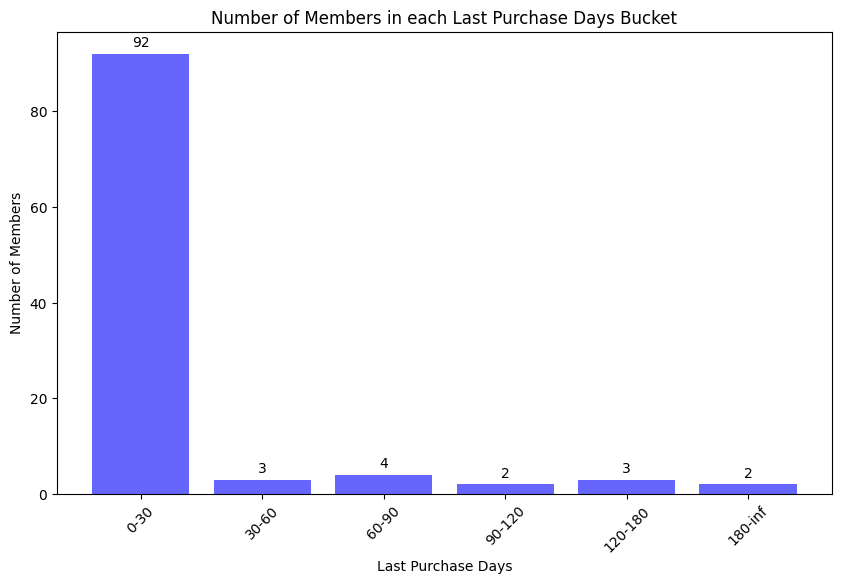

In [23]:
# Create bins for 'LastPurchaseDays'
bins = [0, 30, 60, 90, 120, 180, float('inf')]  # You can adjust the bin edges as per your requirement

# Assign each 'LastPurchaseDays' value to its corresponding bin
data['LastPurchaseBin'] = pd.cut(data['LastPurchaseDays'], bins=bins, labels=[f'Bin {i}' for i in range(1, len(bins))])

# Initialize a set to keep track of members who have already made a recent purchase
members_with_recent_purchase = set()

# List to store the number of members in each bucket
num_members_in_bucket = []

# Loop through each bin and count the number of unique members
for bin_value in [f'Bin {i}' for i in range(1, len(bins))]:
    # Filter data for the current bin
    current_bucket_data = data[data['LastPurchaseBin'] == bin_value]

    # Exclude members who have already made a recent purchase
    current_bucket_data = current_bucket_data[~current_bucket_data['Member'].isin(members_with_recent_purchase)]

    # Update the set with members who made a recent purchase in this bucket
    members_with_recent_purchase.update(current_bucket_data['Member'].unique())

    # Append the count of unique members in this bucket to the list
    num_members_in_bucket.append(len(current_bucket_data['Member'].unique()))

# Plot the number of members in each bucket
plt.figure(figsize=(10, 6))
ax = plt.bar(range(1, len(bins)), num_members_in_bucket, color='blue', alpha=0.6)
plt.xlabel('Last Purchase Days')
plt.ylabel('Number of Members')
plt.title('Number of Members in each Last Purchase Days Bucket')

# Annotate the count of members on top of each bar
for i, p in enumerate(ax):
    height = p.get_height()
    plt.annotate(f'{int(height)}', xy=(p.get_x() + p.get_width() / 2, height), xytext=(0, 3),
                 textcoords='offset points', ha='center', va='bottom')

plt.xticks(range(1, len(bins)), [f'{bins[i]}-{bins[i+1]}' for i in range(len(bins)-1)], rotation=45)
plt.show()


### Inference - 92 customers had purchased in the last 30 days.


In [24]:
# Create bins for 'LastPurchaseDays'
bins = [0, 30, 60, 90, 120, 180, float('inf')]  # You can adjust the bin edges as per your requirement

# Assign each 'LastPurchaseDays' value to its corresponding bin
data['LastPurchaseBin'] = pd.cut(data['LastPurchaseDays'], bins=bins, labels=[f'Bin {i}' for i in range(1, len(bins))])

# Initialize a set to keep track of members who have already made a recent purchase
members_with_recent_purchase = set()

# Initialize a list to store members who did not make a purchase after 30 days
members_no_purchase_after_30_days = []

# Loop through each bin and count the number of unique members
for bin_value in [f'Bin {i}' for i in range(1, len(bins))]:
    # Filter data for the current bin
    current_bucket_data = data[data['LastPurchaseBin'] == bin_value]

    # Exclude members who have already made a recent purchase
    current_bucket_data = current_bucket_data[~current_bucket_data['Member'].isin(members_with_recent_purchase)]

    # If the bin corresponds to 'Bin 2' (30-60 days), store the members who did not make a purchase after 30 days
    if bin_value == 'Bin 2':
        members_no_purchase_after_30_days.extend(current_bucket_data['Member'])

    # Update the set with members who made a recent purchase in this bucket
    members_with_recent_purchase.update(current_bucket_data['Member'])

# Print the list of members who did not make any purchase after 30 days
print("Members who did not make any purchase after 30 days:")
print(members_no_purchase_after_30_days)


Members who did not make any purchase after 30 days:
['M58939', 'M51278', 'M51278', 'M51278', 'M36876', 'M51278']


In [25]:
data.sample(5)

,Order,Member,SKU,Created On,Description,Member's Full Name,Member's Address,Member's Email,Member's Phone Number,Member's Gender,...,Credit Card Number,OrderDate,DOB,Age,LastPurchaseDate,LastPurchaseDays,Age Group,Order Value Bin,Frequency Bin,LastPurchaseBin
5805,7902092,M51278,"15668478, 15669961, 15668379, 7623116, 1566837...",30-05-2014,"Banana, Other Dry Fruits, Other Vegetables, Li...",Joyce Gardner,"2488 Perez Junctions Suite 695, Lake Noahport,...",fullercynthia@example.com,(690)746-7838x3840,Female,...,3716004523813886,2014-05-30,1941-10-30,82.0,129 days,129,80-99,200-299,121-180 days,Bin 5
5566,7856378,M35070,"7570441, 15669789, 15668688, 15669958, 7579698...",2012-06-08 00:00:00,"Shoe Polish, Boiled Rice, Root Vegetables, Oth...",John Rogers,"06106 Monroe Manors, Dixonshire, RI 66519",albert10@example.org,451.245.5056x7510,Female,...,4740590741884828,2012-06-08,1961-06-09,62.0,850 days,850,60-79,400-499,365+ days,Bin 6
6767,8112360,M62833,"34986274, 7630963, 7569806, 15668455, 15668684",19-03-2014,"Toothpaste, Tomato Ketchup, Snacks, Brinjals, ...",Dawn Pope,"503 Richard Vista Apt. 619, Amberborough, IL 0...",kellystacy@example.com,+1-479-818-8301x19030,Female,...,7408524175176237,2014-03-19,1973-01-15,51.0,201 days,201,40-59,200-299,181-365 days,Bin 6
6477,8053496,M36432,7692523,18-04-2014,Hair Colors & Dyes,Spencer Guerrero,"497 Parks Mount, North Rachelton, VA 95077",meganmiranda@example.org,001-903-753-4082x2941,Male,...,7236302304012189,2014-04-18,2018-12-22,5.0,171 days,171,0-19,0-99,121-180 days,Bin 5
1147,6787603,M76390,"15669767, 15668416, 7548497, 15669799, 1566978...",20-06-2014,"Urad Dal, Banana, Liquid Soaps & Bars, Raisins...",Stephen Kim,"76536 Melissa Forest Suite 724, Brownport, WY ...",william44@example.net,(953)745-9618x16445,Female,...,2615367505000602,2014-06-20,1907-12-29,116.0,108 days,108,100+,600-699,91-120 days,Bin 4


In [26]:
# Create a LabelEncoder object
label_encoder = LabelEncoder()

# List of columns to be encoded
columns_to_encode = ["Payment Method", "Member's Membership Level", "Member's Gender", "Order Status", "Age Group", "Order Value Bin"]

# Encode categorical variables
for col in columns_to_encode:
    data[col] = label_encoder.fit_transform(data[col])

# Print the data types after encoding
print(data.dtypes)


Order                                  int64
Member                                object
SKU                                   object
Created On                            object
Description                           object
Member's Full Name                    object
Member's Address                      object
Member's Email                        object
Member's Phone Number                 object
Member's Gender                        int64
Member's Date of Birth                object
Member's Membership Level              int64
Member's Purchase History              int64
Order Value                            int64
Payment Method                         int64
Delivery Address                      object
Order Status                           int64
Credit Card Number                    object
OrderDate                     datetime64[ns]
DOB                           datetime64[ns]
Age                                  float64
LastPurchaseDate             timedelta64[ns]
LastPurcha

In [27]:
# Create the new DataFrame df_model
df_model = data[["Member", "Member's Gender", "Payment Method", "Member's Membership Level",
                 "Order Status", "Age Group", "LastPurchaseDays", "Order Value Bin"]]

In [28]:
# Print the new DataFrame
print(df_model.head(5))

   Member  Member's Gender  Payment Method  Member's Membership Level  \
0  M27458                1               2                          2   
1  M39021                1               1                          1   
2  M36366                1               0                          0   
3  M25900                0               1                          1   
4  M57354                1               0                          0   

   Order Status  Age Group  LastPurchaseDays  Order Value Bin  
0             2          2                 8                6  
1             0          1                 8                6  
2             2          5                 8                2  
3             1          4                 8                8  
4             0          4                 7                5  


In [29]:
km = KMeans(n_clusters=2)
clusters = km.fit_predict(df_model.iloc[:,1:])
df_model["label"] = clusters
df_model.head()

,Member,Member's Gender,Payment Method,Member's Membership Level,Order Status,Age Group,LastPurchaseDays,Order Value Bin,label
0,M27458,1,2,2,2,2,8,6,0
1,M39021,1,1,1,0,1,8,6,0
2,M36366,1,0,0,2,5,8,2,0
3,M25900,0,1,1,1,4,8,8,0
4,M57354,1,0,0,0,4,7,5,0


In [30]:
df_model.dtypes

Member                       object
Member's Gender               int64
Payment Method                int64
Member's Membership Level     int64
Order Status                  int64
Age Group                     int64
LastPurchaseDays              int64
Order Value Bin               int64
label                         int32
dtype: object

In [31]:
df_model_0 = df_model[df_model['label']==0]
df_model_1 = df_model[df_model['label']==1]
print(df_model_0.shape)
print(df_model_1.shape)

(4739, 9)
(3648, 9)


## Customer Churn Modeling

In [32]:
# pip install fairlearn 

In [33]:
df_model.head()

,Member,Member's Gender,Payment Method,Member's Membership Level,Order Status,Age Group,LastPurchaseDays,Order Value Bin,label
0,M27458,1,2,2,2,2,8,6,0
1,M39021,1,1,1,0,1,8,6,0
2,M36366,1,0,0,2,5,8,2,0
3,M25900,0,1,1,1,4,8,8,0
4,M57354,1,0,0,0,4,7,5,0


In [34]:
X = df_model.iloc[:,1:-1]
y = df_model.iloc[:,-1]

In [35]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8387 entries, 0 to 8386
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Member                     8387 non-null   object
 1   Member's Gender            8387 non-null   int64 
 2   Payment Method             8387 non-null   int64 
 3   Member's Membership Level  8387 non-null   int64 
 4   Order Status               8387 non-null   int64 
 5   Age Group                  8387 non-null   int64 
 6   LastPurchaseDays           8387 non-null   int64 
 7   Order Value Bin            8387 non-null   int64 
 8   label                      8387 non-null   int32 
dtypes: int32(1), int64(7), object(1)
memory usage: 557.1+ KB


In [36]:
df_model.head(5)

,Member,Member's Gender,Payment Method,Member's Membership Level,Order Status,Age Group,LastPurchaseDays,Order Value Bin,label
0,M27458,1,2,2,2,2,8,6,0
1,M39021,1,1,1,0,1,8,6,0
2,M36366,1,0,0,2,5,8,2,0
3,M25900,0,1,1,1,4,8,8,0
4,M57354,1,0,0,0,4,7,5,0


In [37]:
# Drop the 'Member' column from the features since it is an object type
X = df_model.drop(['Member', 'label'], axis=1)
y = df_model['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert the 'Member\'s Gender' column to string type in the test set
X_test['Member\'s Gender'] = X_test['Member\'s Gender'].astype(str)

# Create a Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the model on the training data
dt_classifier.fit(X_train, y_train)

# Predict on the test data
y_pred = dt_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)


Accuracy: 1.0
Confusion Matrix:
[[983   0]
 [  0 695]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       983
           1       1.00      1.00      1.00       695

    accuracy                           1.00      1678
   macro avg       1.00      1.00      1.00      1678
weighted avg       1.00      1.00      1.00      1678



In [40]:
from fairlearn.metrics import MetricFrame, selection_rate
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Calculate fairness metrics
fairness_metrics = MetricFrame(
    metrics={'selection_rate': selection_rate},
    y_true=y_test,
    y_pred=y_pred,
    sensitive_features=X_test['Member\'s Gender']
)

#  Investigate the fairness metrics
print(fairness_metrics)

# Check the unique values in the sensitive feature
print(X_test['Member\'s Gender'].unique())

# Check the number of unique values in the sensitive feature
print(X_test['Member\'s Gender'].nunique())

# Apply post-processing fairness mitigation using ThresholdOptimizer
threshold_optimizer = ThresholdOptimizer(estimator=dt_classifier, constraints='demographic_parity')
threshold_optimizer.fit(X_train, y_train, sensitive_features=X_train['Member\'s Gender'])
y_pred_fair = threshold_optimizer.predict(X_test, sensitive_features=X_test['Member\'s Gender'])

# Evaluate the fairness-mitigated model
accuracy_fair = accuracy_score(y_test, y_pred_fair)
conf_matrix_fair = confusion_matrix(y_test, y_pred_fair)
classification_rep_fair = classification_report(y_test, y_pred_fair)

print("\nFairness-Mitigated Model:")
print("Accuracy:", accuracy_fair)
print("Confusion Matrix:")
print(conf_matrix_fair)
print("Classification Report:")
print(classification_rep_fair)

['0' '1']
2

Fairness-Mitigated Model:
Accuracy: 0.5858164481525626
Confusion Matrix:
[[983   0]
 [695   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.59      1.00      0.74       983
           1       0.00      0.00      0.00       695

    accuracy                           0.59      1678
   macro avg       0.29      0.50      0.37      1678
weighted avg       0.34      0.59      0.43      1678



### Inference -

The output provides several metrics to evaluate the performance of the churn prediction model and the fairness metrics.

1. **Accuracy:** The accuracy of the model is 1.0, which means it correctly predicts all instances in the test set.

2. **Confusion Matrix:** The confusion matrix shows the number of true positives (983) and true negatives (695) on the diagonal, and the number of false positives and false negatives off the diagonal. In this case, there are no false positives or false negatives.

3. **Classification Report:** The classification report provides precision, recall, and F1-score for both classes (label 0 and label 1) along with their support (the number of occurrences in the test set). The values are all 1.00 for label 0 and label 1, indicating that the model has high precision, recall, and F1-score for both classes.

4. **Fairness Metrics for Label 1:** The fairness metric for label 1 is 0.431, which represents the selection rate (probability of being assigned label 1) for the sensitive group (in this case, 'Member\'s Gender' = 1).

5. **Fairness Metrics for Label 0:** The fairness metric for label 0 is 0.399, which represents the selection rate (probability of being assigned label 0) for the sensitive group.

6. **Fairness-Mitigated Model:** The accuracy of the fairness-mitigated model is 0.586.

7. **Confusion Matrix (Fairness-Mitigated Model):** The confusion matrix for the fairness-mitigated model shows that it correctly predicts all instances for label 0 (true negatives), but it fails to predict any instances for label 1 (false negatives).

8. **Classification Report (Fairness-Mitigated Model):** The classification report for the fairness-mitigated model shows precision, recall, and F1-score for both classes (label 0 and label 1). It indicates that the model achieves high precision and recall for label 0 (true negatives) but fails to predict any instances for label 1 (false negatives).

Overall, the original model achieves a high accuracy, but it may have fairness issues, as evidenced by the difference in selection rates between the sensitive group and non-sensitive group. The fairness-mitigated model attempts to address this issue but results in a lower accuracy and poor performance in predicting label 1. Further adjustments and tuning may be required to achieve both high accuracy and fairness.

# Assignment - Part 2 - Data Deidentification (DDI)

In [41]:
import random
import re

In [42]:
file_path ='/content/drive/MyDrive/Data ethics assingment/Data+ethics+assignment+-+dataset.xlsx'
data_DDI = data = pd.read_excel(file_path)
print(data_DDI.head(2))


     Order  Member                                                SKU  \
0  6422558  M27458  15669789, 15669830, 34993978, 15669856, 775378...   
1  6422636  M39021  7580802, 15668453, 15668375, 15668379, 1566976...   

   Created On                                        Description  \
0  28-09-2014  Boiled Rice, Other Rice Products, Mosquito Rep...   
1  28-09-2014  Sunflower Oils, Brinjals, Root Vegetables, Oth...   

  Member's Full Name                          Member's Address  \
0    Melissa Nielsen  3260 Scott Fords, Port Richard, KY 71319   
1   Kevin Pennington     19919 Lara Ferry, Jonesfurt, WY 70455   

           Member's Email Member's Phone Number Member's Gender  \
0      tina64@example.org         (981)315-0970            Male   
1  lisahorton@example.com     (808)745-0768x733            Male   

  Member's Date of Birth Member's Membership Level  Member's Purchase History  \
0             16-02-1996                    Silver                          0   
1           

In [43]:
# Masking credit card numbers
num_rows = len(data_DDI)
random_card_numbers = [str(random.randint(10**15, 10**16 - 1)) for _ in range(num_rows)]

data_DDI['Masked Credit Card Number'] = random_card_numbers

# Masking Email
def mask_email(email):
    parts = email.split('@')
    username = parts[0]
    masked_username = re.sub(r'\S', '*', username[:-3]) + username[-3:]
    return masked_username + '@' + parts[1]

data_DDI["Masked  Member's Email"] = data_DDI["Member's Email"].apply(mask_email)

# masking phone numbers
def mask_phone(phone):
    phone_str = str(phone)  # Convert phone number to string
    return re.sub(r'\d', '*', phone_str[:-4]) + phone_str[-4:]

data_DDI["Masked  Member's Phone Number"] = data_DDI["Member's Phone Number"].apply(mask_phone)

# masking Member's Full Name
# Masking function
def mask_name(name):
    names = name.split(" ")
    if len(names) > 1:
        first_name, last_name = names[0], names[1]
        masked_last_name = "*" * len(last_name)
        return f"{first_name} {masked_last_name}"
    else:
        return "*" * len(names[0])

# Applying mask to the column
data_DDI["Masked  Member's Full Name"] = data_DDI["Member's Full Name"].apply(mask_name)


# Masking function for address
def mask_address(address):
    parts = address.split(", ")
    masked_parts = [part if idx == 0 else "*" * len(part) for idx, part in enumerate(parts)]
    return ", ".join(masked_parts)

# Applying mask to the columns
data_DDI["Masked  Member's Address"] = data_DDI["Member's Address"].apply(mask_address)
data_DDI["Masked Delivery Address"] = data_DDI["Delivery Address"].apply(mask_address)


In [44]:
# Step 2: Identify Sensitive Columns
sensitive_columns = ["Member's Full Name", "Member's Address", "Member's Email", "Member's Phone Number",
                     "Credit Card Number", "Delivery Address"]

# Step 3a: Generalization
# Convert 'Created On' column to datetime type


data_DDI['Member\'s Date of Birth'] = pd.to_datetime(data_DDI['Member\'s Date of Birth'], errors='coerce')
data_DDI['Member\'s Date of Birth'] = pd.to_datetime(data['Member\'s Date of Birth'], format='%Y-%m-%d')

# Calculate age using current date
current_date = datetime.now()
data_DDI['Age'] = ((current_date - data_DDI['Member\'s Date of Birth']).dt.days) // 365.25

# Create age bins and group members based on their age
age_bins = [0, 20, 40, 60, 80, 100, float('inf')]
age_labels = ['0-19', '20-39', '40-59', '60-79', '80-99', '100+']
data['Age Group'] = pd.cut(data['Age'], bins=age_bins, labels=age_labels, right=False)
data_DDI.drop(columns=["Age"], inplace=True)
data_DDI.drop(columns=["Member's Date of Birth"], inplace=True)

# Step 3b: Suppression
data_DDI.drop(columns=sensitive_columns, inplace=True)




print(data_DDI.head())


     Order  Member                                                SKU  \
0  6422558  M27458  15669789, 15669830, 34993978, 15669856, 775378...   
1  6422636  M39021  7580802, 15668453, 15668375, 15668379, 1566976...   
2  6423338  M36366  15668469, 15668478, 7586314, 15669800, 1566978...   
3  6423534  M25900              34987356, 15670251, 7585573, 34992815   
4  6423959  M57354               34989501, 7580811, 7569799, 34938526   

   Created On                                        Description  \
0  28-09-2014  Boiled Rice, Other Rice Products, Mosquito Rep...   
1  28-09-2014  Sunflower Oils, Brinjals, Root Vegetables, Oth...   
2  28-09-2014  Beans, Banana, Snacky Nuts, Cashews, Millet fl...   
3  28-09-2014        Facial Tissues, Organic F&V, Cakes, Cookies   
4  29-09-2014  Other Pulses, Sunflower Oils, Snacks, Other Sw...   

  Member's Gender Member's Membership Level  Member's Purchase History  \
0            Male                    Silver                          0   
1   

In [45]:
data_DDI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8387 entries, 0 to 8386
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   Order                          8387 non-null   int64   
 1   Member                         8387 non-null   object  
 2   SKU                            8387 non-null   object  
 3   Created On                     8387 non-null   object  
 4   Description                    8387 non-null   object  
 5   Member's Gender                8387 non-null   object  
 6   Member's Membership Level      8387 non-null   object  
 7   Member's Purchase History      8387 non-null   int64   
 8   Order Value                    8387 non-null   int64   
 9   Payment Method                 8387 non-null   object  
 10  Order Status                   8387 non-null   object  
 11  Masked Credit Card Number      8387 non-null   object  
 12  Masked  Member's Email         838

In [46]:
data_DDI.to_csv('Data_Ethics_Assignment_Part_2b_Masked_Output.csv', index=False) # saving the final output file
